## Week 8 Homework

---

### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*


### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma` 
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function


### Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$. 

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers" 
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim \mathcal{MVN}(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $\mathcal N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?





### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$



We are given:

### **1.1 Likelihood Function**
The **likelihood** for the linear regression model follows a **multivariate normal distribution**:

$$
p(\mathbf{y} | \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \propto \exp \left(-\frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top \Sigma^{-1} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

Since it is given that $ \Sigma = \sigma^2 I $, we substitute:

$$
p(\mathbf{y} | \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \propto \exp \left(-\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

which shows that:

$$
\mathbf{y} \sim \mathcal{MVN}(\mathbf{X} \boldsymbol{\beta}, \sigma^2 I)
$$

### **1.2 Prior Distribution**
The prior on $ \boldsymbol{\beta} $ is given as:

$$
p(\boldsymbol{\beta}) = \mathcal{MVN}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_{\beta})
$$

which means:

$$
p(\boldsymbol{\beta}) \propto \exp \left( -\frac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_{\beta}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right)
$$

Using Bayes' theorem:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2) \propto p(\mathbf{y} | \boldsymbol{\beta}, \mathbf{X}, \sigma^2) p(\boldsymbol{\beta})
$$

Substituting the likelihood and prior:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2) \propto \exp \left(-\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

$$
\cdot \exp \left( -\frac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_{\beta}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right)
$$

Taking the exponent together:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2) \propto \exp \left( -\frac{1}{2} \left[ \frac{1}{\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_{\beta}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right] \right)
$$


Expanding the first term:

$$
(\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})
$$

Expanding the quadratic term:

$$
\mathbf{y}^\top \mathbf{y} - 2 \mathbf{y}^\top \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta}
$$

Similarly, expanding the prior term:

$$
(\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_{\beta}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) =
$$

$$
\boldsymbol{\beta}^\top \boldsymbol{\Sigma}_{\beta}^{-1} \boldsymbol{\beta} - 2 \boldsymbol{\beta}_0^\top \boldsymbol{\Sigma}_{\beta}^{-1} \boldsymbol{\beta} + \boldsymbol{\beta}_0^\top \boldsymbol{\Sigma}_{\beta}^{-1} \boldsymbol{\beta}_0
$$

Rewriting in matrix form:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2) \propto \exp \left( -\frac{1}{2} \left[ \boldsymbol{\beta}^\top (\mathbf{X}^\top \mathbf{X}/\sigma^2 + \boldsymbol{\Sigma}_{\beta}^{-1}) \boldsymbol{\beta} - 2 \boldsymbol{\beta}^\top (\mathbf{X}^\top \mathbf{y}/\sigma^2 + \boldsymbol{\Sigma}_{\beta}^{-1} \boldsymbol{\beta}_0) + C \right] \right)
$$

where $ C $ represents constant terms that do not depend on $ \boldsymbol{\beta} $.

Recognizing this as a Gaussian form, we identify the **posterior mean and covariance**:


- **Posterior Mean**:

$$
\boldsymbol{\beta}_n = \boldsymbol{\Sigma}_n \left( \mathbf{X}^\top \mathbf{y} / \sigma^2 + \boldsymbol{\Sigma}_{\beta}^{-1} \boldsymbol{\beta}_0 \right)
$$

- **Posterior Covariance**:

$$
\boldsymbol{\Sigma}_n = \left( \mathbf{X}^\top \mathbf{X} / \sigma^2 + \boldsymbol{\Sigma}_{\beta}^{-1} \right)^{-1}
$$

Thus, the **posterior is a multivariate normal distribution**:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2) = \mathcal{MVN}(\boldsymbol{\beta}_n, \boldsymbol{\Sigma}_n)
$$

### **Final Answer:**
$$
\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}, \sigma^2 \sim \mathcal{MVN} \left( \boldsymbol{\beta}_n, \boldsymbol{\Sigma}_n \right)
$$

where:

$$
\boldsymbol{\Sigma}_n = \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{X} + \boldsymbol{\Sigma}_{\beta}^{-1} \right)^{-1}
$$

$$
\boldsymbol{\beta}_n = \boldsymbol{\Sigma}_n \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \boldsymbol{\Sigma}_{\beta}^{-1} \boldsymbol{\beta}_0 \right)
$$



### Q1: derive the following
2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).


We are given a **linear regression model**:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \sigma^2 I)
$$

which means:

$$
\mathbf{y} | \boldsymbol{\beta}, \sigma^2 \sim \mathcal{MVN}(\mathbf{X} \boldsymbol{\beta}, \sigma^2 I)
$$

### **1.1 Likelihood Function**
From the multivariate normal likelihood function:

$$
p(\mathbf{y} | \boldsymbol{\beta}, \sigma^2) \propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

### **1.2 Prior for $ \sigma^2 $**
We assume an **inverse-gamma prior** for $ \sigma^2 $:

$$
p(\sigma^2) = \text{Inv-Gamma}(\alpha^*, \beta^*)
$$

which has the density function:

$$
p(\sigma^2) \propto (\sigma^2)^{-\alpha^* - 1} \exp \left(-\frac{\beta^*}{\sigma^2} \right)
$$



Using Bayes' theorem:

$$
p(\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \propto p(\mathbf{y} | \boldsymbol{\beta}, \sigma^2) p(\sigma^2)
$$

Substituting the likelihood and prior:

$$
p(\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

$$
\cdot (\sigma^2)^{-\alpha^* - 1} \exp \left(-\frac{\beta^*}{\sigma^2} \right)
$$

Rewriting the exponent terms:

$$
p(\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \propto (\sigma^2)^{-\left(\alpha^* + \frac{n}{2} + 1 \right)} \exp \left(-\frac{1}{\sigma^2} \left[ \beta^* + \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right] \right)
$$


The above expression matches the kernel of an **inverse-gamma distribution**:

$$
\text{Inv-Gamma}(\alpha_{\text{new}}, \beta_{\text{new}})
$$

where:

$$
\alpha_{\text{new}} = \alpha^* + \frac{n}{2}
$$

$$
\beta_{\text{new}} = \beta^* + \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})
$$

Thus, the **posterior distribution of** $ \sigma^2 $ **is also inverse-gamma**:

$$
\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta} \sim \text{Inv-Gamma} \left( \alpha^* + \frac{n}{2}, \beta^* + \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

### **Final Answer:**
$$
p(\sigma^2 | \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) = \text{Inv-Gamma} \left( \alpha^* + \frac{n}{2}, \beta^* + \frac{1}{2} \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2 \right)
$$



#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*

We are given the **Bayesian posterior distribution**:

$$
p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}) \propto p(\mathbf{y} | \boldsymbol{\beta}, \mathbf{X}) p(\boldsymbol{\beta})
$$

Taking the **log**:

$$
\log p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}) = \log p(\mathbf{y} | \boldsymbol{\beta}, \mathbf{X}) + \log p(\boldsymbol{\beta}) + C
$$

where $ C $ is a **normalizing constant** that does not depend on $ \boldsymbol{\beta} $.

---

For a **linear regression model**, the likelihood follows:

$$
p(\mathbf{y} | \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \propto \exp \left(-\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

Taking the **log-likelihood**:

$$
\log p(\mathbf{y} | \boldsymbol{\beta}, \mathbf{X}, \sigma^2) = -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + C
$$

which is equivalent to the **squared error loss function**.

---

A **normal (Gaussian) prior** on $ \beta_j $ is:

$$
p(\beta_j) = \mathcal{N}(0, s_i^2) \propto \exp \left( -\frac{\beta_j^2}{2 s_i^2} \right)
$$

For **$ s_i = 1 $**, this simplifies to:

$$
p(\boldsymbol{\beta}) \propto \exp \left( -\frac{1}{2} \sum_{j=1}^{p} \beta_j^2 \right)
$$

Taking the **log prior**:

$$
\log p(\boldsymbol{\beta}) = -\frac{1}{2} \sum_{j=1}^{p} \beta_j^2 + C
$$


The **log posterior** is:

$$
\log p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}) = -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) - \frac{1}{2} \sum_{j=1}^{p} \beta_j^2 + C
$$

Ignoring constants, this corresponds to **ridge regression**:

$$
\hat{\boldsymbol{\beta}} = \arg \min_{\boldsymbol{\beta}} \left[ \frac{1}{2} \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right]
$$

where $ \lambda = \sigma^2 / 2 $.

Thus, a **Gaussian prior naturally leads to ridge regression**.

---

A **Laplace prior** (double-exponential distribution) for $ \beta_j $ is:

$$
p(\beta_j) \propto \exp \left( -\frac{|\beta_j|}{b_i} \right)
$$

For **$ b_i = 1 $**, this simplifies to:

$$
p(\boldsymbol{\beta}) \propto \exp \left( -\sum_{j=1}^{p} |\beta_j| \right)
$$

Taking the **log prior**:

$$
\log p(\boldsymbol{\beta}) = -\sum_{j=1}^{p} |\beta_j| + C
$$


The **log posterior** is:

$$
\log p(\boldsymbol{\beta} | \mathbf{y}, \mathbf{X}) = -\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) - \sum_{j=1}^{p} |\beta_j| + C
$$

Ignoring constants, this corresponds to **lasso regression**:

$$
\hat{\boldsymbol{\beta}} = \arg \min_{\boldsymbol{\beta}} \left[ \frac{1}{2} \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right]
$$

where $ \lambda = 1/\sigma^2 $.

Thus, a **Laplace prior naturally leads to lasso regression**.

---

## **Final Conclusion**
| Prior | Log Prior | Leads to |
|-------|----------|----------|
| **Gaussian** ($\mathcal{N}(0, s_i^2)$) | $-\frac{1}{2} \sum_{j=1}^{p} \beta_j^2$ | **Ridge Regression** |
| **Laplace** ($\text{Laplace}(0, b_i)$) | $-\sum_{j=1}^{p} |\beta_j|$ | **Lasso Regression** |

Thus, Bayesian priors **act as regularization terms** in frequentist machine learning:

- **Gaussian prior $\to$ Ridge regression** (L2 regularization)
- **Laplace prior $\to$ Lasso regression** (L1 regularization)

Even though **Bayesians do not optimize the posterior**, the **posterior distribution inherently provides shrinkage**, which is equivalent to the penalty terms in ridge and lasso regression.



### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma` 
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("california_housing.csv")
df.head()

df_subset = df.iloc[:1000]  # Select first 1000 rows
df_subset.head()

In [ ]:
# Select numerical features
features = [
    "housing_median_age", "total_rooms", "total_bedrooms",
    "population", "households", "median_income"
]
target = "median_house_value"

# Drop rows with missing values
df = df.dropna()

# Define features and target variable
X = df[features]
y = df[target]

# Standardize features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to numpy arrays for PyMC
X_train = np.array(X_train)
y_train = np.array(y_train)

n_samples, n_features = X_train.shape


In [5]:
# Define Bayesian Linear Regression Model
with pm.Model() as model:
    # Priors for regression coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=n_features)
    
    # Prior for intercept
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    
    # Half-Normal prior for sigma (error variance)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Linear model
    mu = intercept + pm.math.dot(X_train, betas)
    
    # Likelihood (Normal distribution)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_train)

    # Perform inference using MCMC
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.95)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, intercept, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 390 seconds.


            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]   0.205  0.006     0.194      0.216      0.000      0.0    7817.0   
betas[1]  -0.376  0.018    -0.410     -0.341      0.000      0.0    4671.0   
betas[2]   0.383  0.030     0.324      0.443      0.001      0.0    3387.0   
betas[3]  -0.330  0.012    -0.356     -0.307      0.000      0.0    5443.0   
betas[4]   0.385  0.030     0.327      0.443      0.000      0.0    3875.0   
betas[5]   0.785  0.006     0.773      0.797      0.000      0.0    4885.0   
intercept -0.001  0.005    -0.012      0.009      0.000      0.0    8334.0   
sigma      0.657  0.004     0.650      0.664      0.000      0.0    7714.0   

           ess_tail  r_hat  
betas[0]     6057.0    1.0  
betas[1]     5279.0    1.0  
betas[2]     4961.0    1.0  
betas[3]     5722.0    1.0  
betas[4]     5133.0    1.0  
betas[5]     4987.0    1.0  
intercept    5899.0    1.0  
sigma        5731.0    1.0  


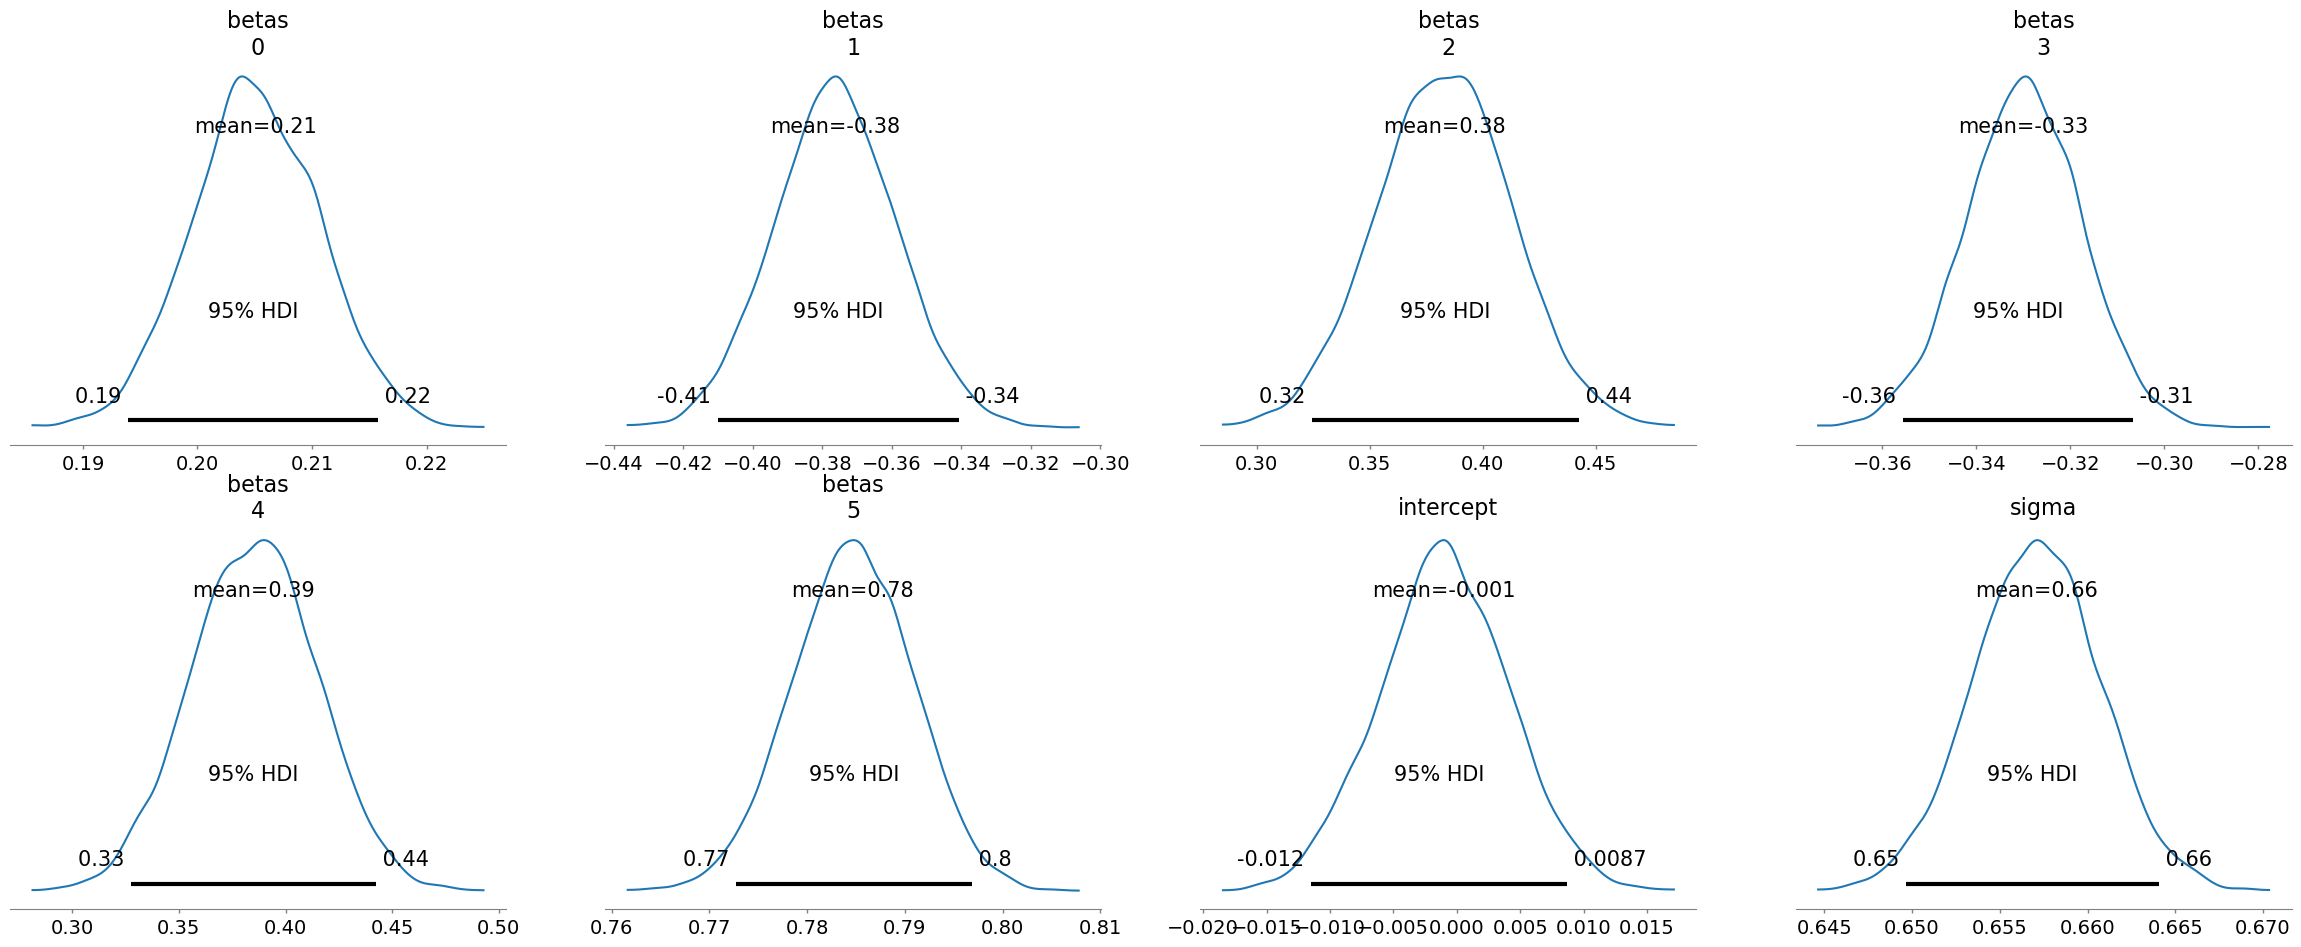

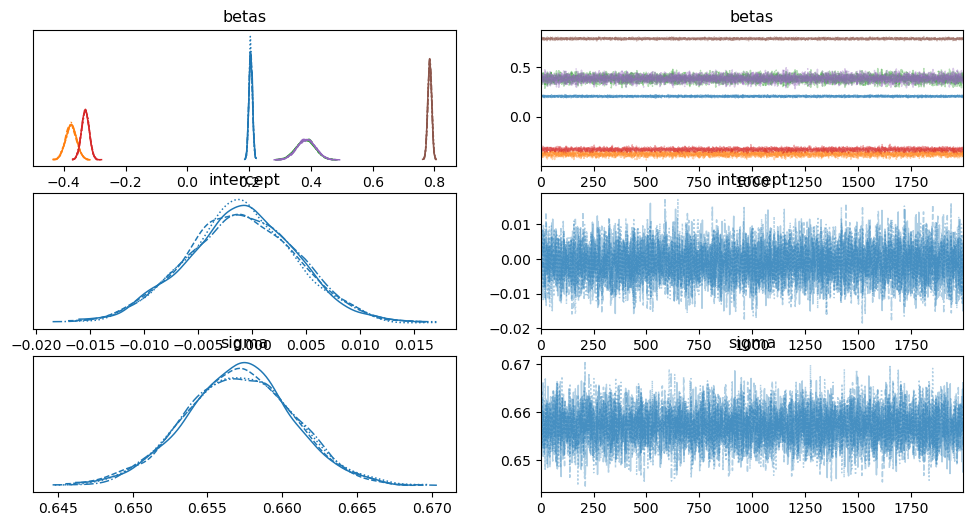

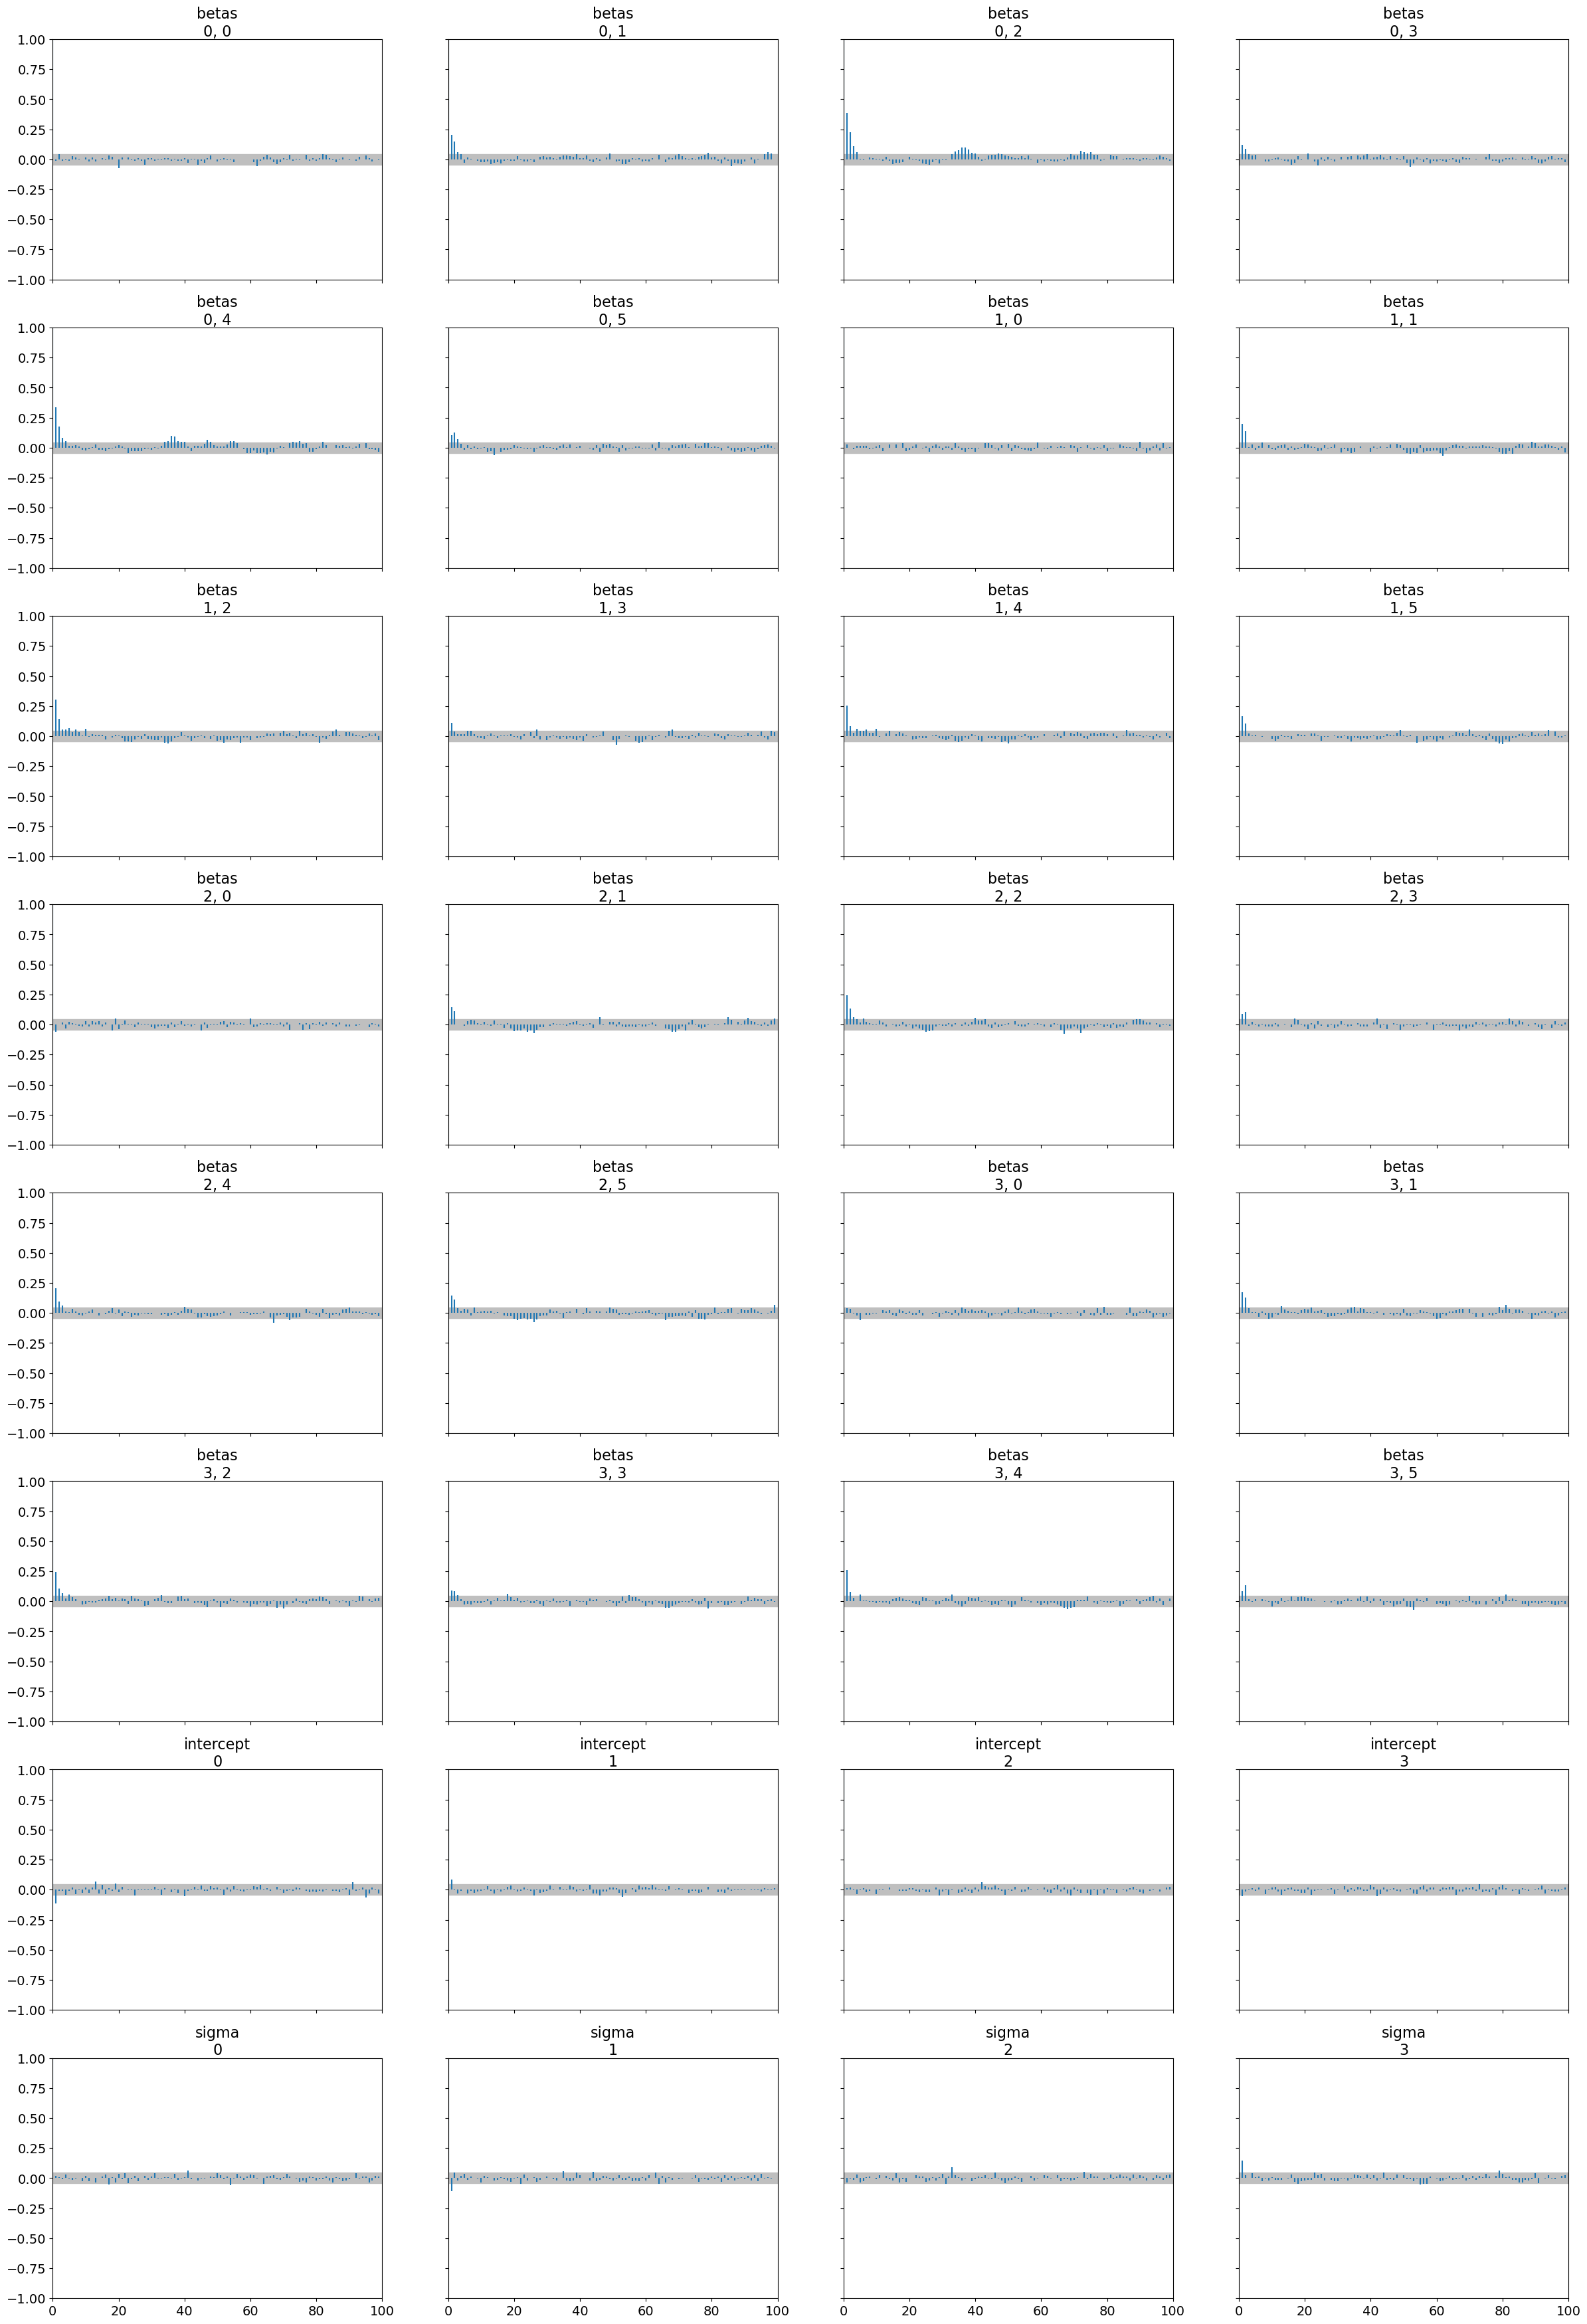

In [6]:
# Summary statistics
print(az.summary(trace, hdi_prob=0.95))

# Plot posterior distributions
az.plot_posterior(trace, hdi_prob=0.95)
plt.show()

# Trace plots
az.plot_trace(trace)
plt.show()

# Autocorrelation plot
az.plot_autocorr(trace)
plt.show()


In [7]:
with model:
    ppc = pm.sample_posterior_predictive(trace, var_names=["y_obs"])

# Convert to InferenceData
ppc_data = az.from_pymc(posterior_predictive=ppc, model=model)

# Plot posterior predictive checks
az.plot_ppc(ppc_data)
plt.show()


Sampling: [y_obs]


AttributeError: module 'arviz' has no attribute 'from_pymc'

In [ ]:
with pm.Model() as glm_model:
    # Priors for coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=n_features)
    
    # Prior for intercept
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    
    # Half-Normal prior for sigma
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Expected value with log link function
    mu = intercept + pm.math.dot(X_train, betas)
    
    # Likelihood (Lognormal for positive house prices)
    y_obs = pm.Lognormal("y_obs", mu=mu, sigma=sigma, observed=np.log(y_train + 1))  # Adding 1 to avoid log(0)
    
    # MCMC sampling
    trace_glm = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.95)

# Posterior analysis
az.plot_trace(trace_glm)
plt.show()
